# Predicting heart disease using Machine learning and Neural networks


In this notebook we're using various python based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not someone has heart disease based on their medical attributes

## 1. Problem Defination
In a statement,
>  Given clinical parameters about a patient, can we predict whether or not they have heart disease?

## 2. Data
The original data came from the Cleavland data from the UCI Machine Learning Repository. https://archive.ics.uci.edu/ml/datasets/heart+Disease

## 3. Evaluation
In this project, we'll try to improve accuracy of model using all possible classfication algorithms, Our main goal is to build and use a machine learning/deep learning model with an accuracy greater than 95 percentage.

## 4. Features
This is where you'll get different information about each of the features in your data. You can do this via doing your own research (such as looking at the links above) or by talking to a subject matter expert (someone who knows about the dataset).

*** Data dictionary ***
1. age - age in years
2. sex - (1 = male; 0 = female)
3. cp - chest pain type
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl
    * serum = LDL + HDL + .2 * triglycerides
    * above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    * '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results.
    * 0: Nothing to note
    * 1: ST-T Wave abnormality
        can range from mild symptoms to severe problems
        signals non-normal heart beat
    * 2: Possible or definite left ventricular hypertrophy
        Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina (1 = yes; 0 = no)
10. oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
    * 0: Upsloping: better heart rate with excercise (uncommon)
    * 1: Flatsloping: minimal change (typical healthy heart)
    * 2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy
    * colored vessel means the doctor can see the blood passing through
    * the more blood movement the better (no clots)
13. thal - thalium stress result
    * 1,3: normal
    * 6: fixed defect: used to be defect but ok now
    * 7: reversable defect: no proper blood movement when excercising
14. target - have disease or not (1=yes, 0=no) **(the predicted attribute)**

### The framework used for this project
<img src="images/framework.png">

In [1]:
## Importing all tools we needed for machine learning model and data analysis..

# Data analysis tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Models from Sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier

# Model Evaluation

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import f1_score, precision_score, classification_report, recall_score, plot_roc_curve



## Loading the data using pandas

In [2]:
df = pd.read_csv("dataset/heart.csv")
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


## Exploratory data analysis (EDA)
The goal here is to find out more about data and become a subject matter expert on given dataset. 

In [11]:
# First 5 rows of dataset
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [13]:
# Last 5 rows of dataset
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [14]:
# Let's find how many classes are there is dataset
df.target.value_counts()

1    526
0    499
Name: target, dtype: int64

In [15]:
# Are there any missing values from the dataset
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [17]:
# Describes the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1025.0,54.434146,9.072290,29.0,48.0,56.0,61.0,77.0
sex,1025.0,0.695610,0.460373,0.0,0.0,1.0,1.0,1.0
cp,1025.0,0.942439,1.029641,0.0,0.0,1.0,2.0,3.0
trestbps,1025.0,131.611707,17.516718,94.0,120.0,130.0,140.0,200.0
chol,1025.0,246.000000,51.592510,126.0,211.0,240.0,275.0,564.0
fbs,1025.0,0.149268,0.356527,0.0,0.0,0.0,0.0,1.0
restecg,1025.0,0.529756,0.527878,0.0,0.0,1.0,1.0,2.0
thalach,1025.0,149.114146,23.005724,71.0,132.0,152.0,166.0,202.0
exang,1025.0,0.336585,0.472772,0.0,0.0,0.0,1.0,1.0
oldpeak,1025.0,1.071512,1.175053,0.0,0.0,0.8,1.8,6.2


In [4]:
# 1- Male and 0 - Female
df.sex.value_counts()

1    713
0    312
Name: sex, dtype: int64

In [6]:
#comparison of sex column with target column using crosstab pandas function
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,86,413
1,226,300


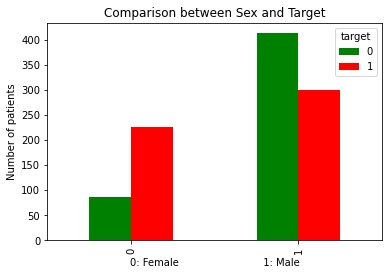

In [19]:
pd.crosstab(df.sex, df.target).plot(kind= "bar", color=["green", "red"])
plt.ylabel("Number of patients") 
plt.xlabel("0: Female                           1: Male")
plt.title("Comparison between Sex and Target");

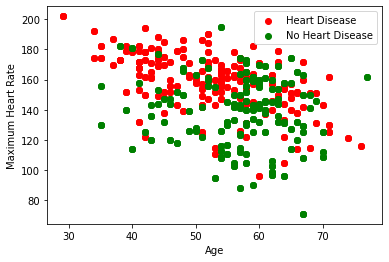

In [13]:
# Comparison of age with maximum heart rate
plt.scatter(x=df.age[df.target==1], y=df.thalach[(df.target==1)], c="red")
plt.scatter(x=df.age[df.target==0], y=df.thalach[(df.target==0)], c="green")
plt.legend(["Heart Disease", "No Heart Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate");

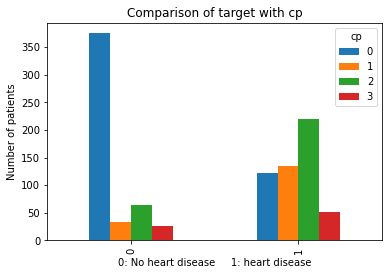

In [6]:
pd.crosstab(df.target, df.cp).plot(kind="bar")
plt.xlabel("0: No heart disease     1: heart disease")
plt.ylabel("Number of patients")
plt.title("Comparison of target with cp");

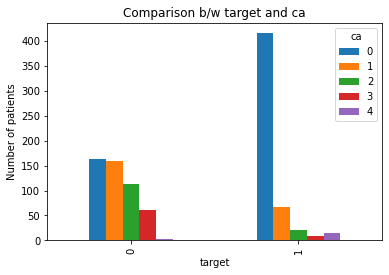

In [7]:
pd.crosstab(df.target, df.ca).plot(kind="bar",title = "Comparison b/w target and ca", ylabel="Number of patients");

## Let's make a correlation matrix using seaborn's sns


In [8]:
import seaborn as sns
correla_matrix = df.corr()

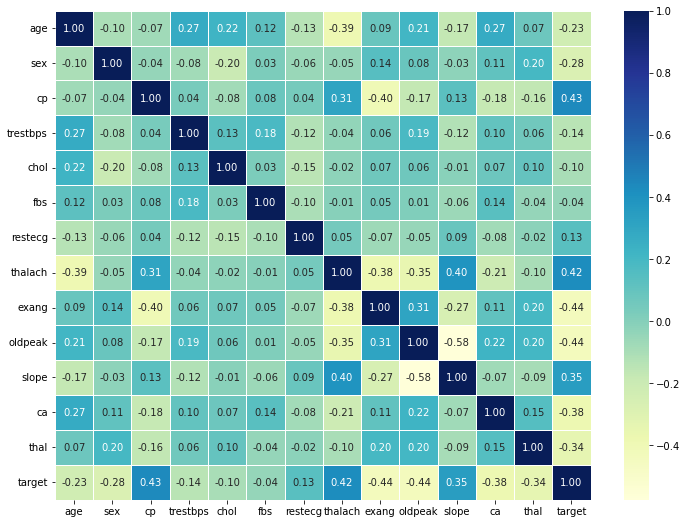

In [12]:
# make correlation matrix prettier using sns
fig, ax = plt.subplots(figsize=(12, 9))
ax = sns.heatmap(correla_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap = "YlGnBu");

## Modelling

In [3]:
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


#### Spliting dataset into features and label

In [11]:
X = df.drop("target", axis = 1)
y = df["target"]

In [120]:
# split features and labels into training and testing samples
np.random.seed(42) #np.random.seed() is used to produced exact same random partition in each iteration
X_train , X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

Since we've splited our dataset into training and testing sets,
we'll find pattern in training sample and evaluate it into testing set

### We are going to try different machine learning models .
1. Decision Tree Classifier
2. K-nearest Neighbours Classification
3. Random Forest Classification
4. Logistic Regression (Despite of name being regression it is used in classification problems)
5. Support Vector machine
6. XGBoost Classifier

In [119]:
# Put the models into dictionary

models = { "Decision Tree Classifier": DecisionTreeClassifier(random_state=99),
          "KNN": KNeighborsClassifier(),
          "Random Forest Classification": RandomForestClassifier(),
          "Logistic Regression": LogisticRegression(),
          "Support Vector machine":SVC(),
          "XGBoost Classifier ":XGBClassifier(use_label_encoder=False),}

# Function to fit and score the model
def fit_score(X_train, X_test, y_train, y_test):
    np.random.seed(42) # to produce same result in every iteration
    model_score = {}
    for name, model in models.items():
        #Fit the model
        model.fit(X_train, y_train)
        #Evaluate the score
        model_score[name] = model.score(X_test, y_test)
    return model_score


In [121]:
accuracy = fit_score(X_train, X_test, y_train, y_test)
accuracy

C:\Users\rajne\Desktop\ml-course\env\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Decision Tree Classifier': 0.9707792207792207,
 'KNN': 0.7142857142857143,
 'Random Forest Classification': 0.9805194805194806,
 'Logistic Regression': 0.8181818181818182,
 'Support Vector machine': 0.6753246753246753,
 'XGBoost Classifier ': 0.9902597402597403}